In [ ]:
pip install nsepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for nsepy: filename=nsepy-0.8-py3-none-any.whl size=36084 sha256=e46e84b824e4062e81068b05b437c2cad1a8ce7d8cc62898db545db4fa36b052
  Stored in directory: /root/.cache/pip/wheels/32/ab/d9/78ceea14cdf6de83376082b3cb0c2999fd77f823e35c47b9ec
Successfully built nsepy


In [ ]:
from nsepy import get_history as gh
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
start = dt.datetime(2013, 1, 1)
end = dt.datetime(2018, 12, 31)
stk_data = gh(symbol = 'SBIN', start = start, end = end)

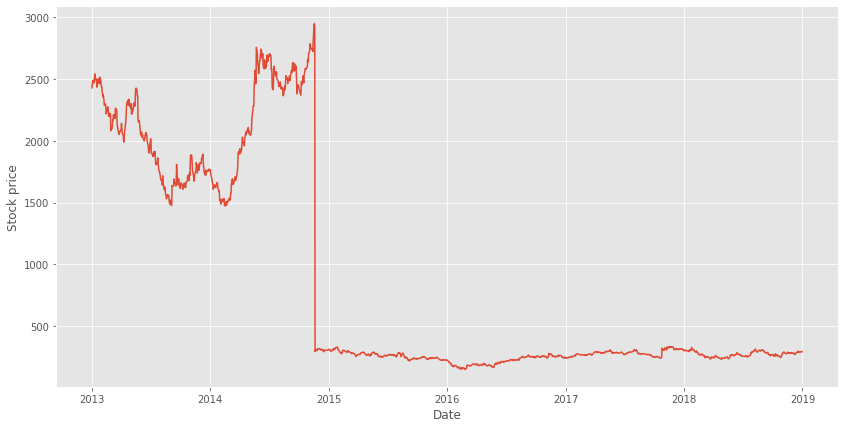

In [ ]:
plt.figure(figsize = (14, 7))
plt.plot(stk_data['Close'])
plt.xlabel('Date')
plt.ylabel('Stock price')
plt.show()

In [ ]:
stk_data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2013-01-01,SBIN,EQ,2385.50,2404.9,2434.05,2397.55,2425.3,2426.45,2423.75,1720230,4.169403e+14,64215,662638,0.3852
2013-01-02,SBIN,EQ,2426.45,2450.0,2464.00,2438.15,2451.9,2450.55,2453.53,1466012,3.596900e+14,61823,508795,0.3471
2013-01-03,SBIN,EQ,2450.55,2460.0,2482.40,2436.20,2470.7,2471.60,2465.12,2010309,4.955653e+14,71411,820537,0.4082
2013-01-04,SBIN,EQ,2471.60,2460.0,2492.95,2450.65,2490.0,2486.70,2475.69,1370595,3.393164e+14,62637,231546,0.1689
2013-01-07,SBIN,EQ,2486.70,2490.0,2499.00,2461.75,2465.0,2467.60,2481.24,1026449,2.546866e+14,48683,269798,0.2628


In [ ]:
stk_data['Date'] = stk_data.index
data2 = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
data2['Date'] = stk_data['Date']
data2['Open'] = stk_data['Open']
data2['High'] = stk_data['High']
data2['Low'] = stk_data['Low']
data2['Close'] = stk_data['Close']

In [ ]:
data2.head()

,Date,Open,High,Low,Close
Date,,,,,
2013-01-01,2013-01-01,2404.9,2434.05,2397.55,2426.45
2013-01-02,2013-01-02,2450.0,2464.00,2438.15,2450.55
2013-01-03,2013-01-03,2460.0,2482.40,2436.20,2471.60
2013-01-04,2013-01-04,2460.0,2492.95,2450.65,2486.70
2013-01-07,2013-01-07,2490.0,2499.00,2461.75,2467.60


In [ ]:
train_set = data2.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, 1482):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
y_train

array([0.67631471, 0.67590428, 0.68880601, ..., 0.04919788, 0.05057192,
       0.04946555])

In [ ]:
X_train.shape

(1422, 60, 1)

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 15, batch_size = 32)

Epoch 1/15
45/45 [==============================] - 13s 124ms/step - loss: 0.0206
Epoch 2/15
45/45 [==============================] - 6s 128ms/step - loss: 0.0092
Epoch 3/15
45/45 [==============================] - 6s 124ms/step - loss: 0.0082
Epoch 4/15
45/45 [==============================] - 6s 124ms/step - loss: 0.0081
Epoch 5/15
45/45 [==============================] - 6s 126ms/step - loss: 0.0065
Epoch 6/15
45/45 [==============================] - 6s 126ms/step - loss: 0.0055
Epoch 7/15
45/45 [==============================] - 6s 125ms/step - loss: 0.0055
Epoch 8/15
45/45 [==============================] - 6s 126ms/step - loss: 0.0047
Epoch 9/15
45/45 [==============================] - 6s 125ms/step - loss: 0.0040
Epoch 10/15
45/45 [==============================] - 6s 124ms/step - loss: 0.0050
Epoch 11/15
45/45 [==============================] - 6s 124ms/step - loss: 0.0054
Epoch 12/15
45/45 [==============================] - 6s 128ms/step - loss: 0.0049
Epoch 13/15
45/45 [=====

In [ ]:
testdataframe= gh(symbol='SBIN',start=dt.datetime(2019,1,1),end=dt.datetime(2019,9,18))
testdataframe['Date'] = testdataframe.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
testdata['Date'] = testdataframe['Date']
testdata['Open'] = testdataframe['Open']
testdata['High'] = testdataframe['High']
testdata['Low'] = testdataframe['Low']
testdata['Close'] = testdataframe['Close']
real_stock_price = testdata.iloc[:, 1:2].values
dataset_total = pd.concat((data2['Open'], testdata['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 235):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

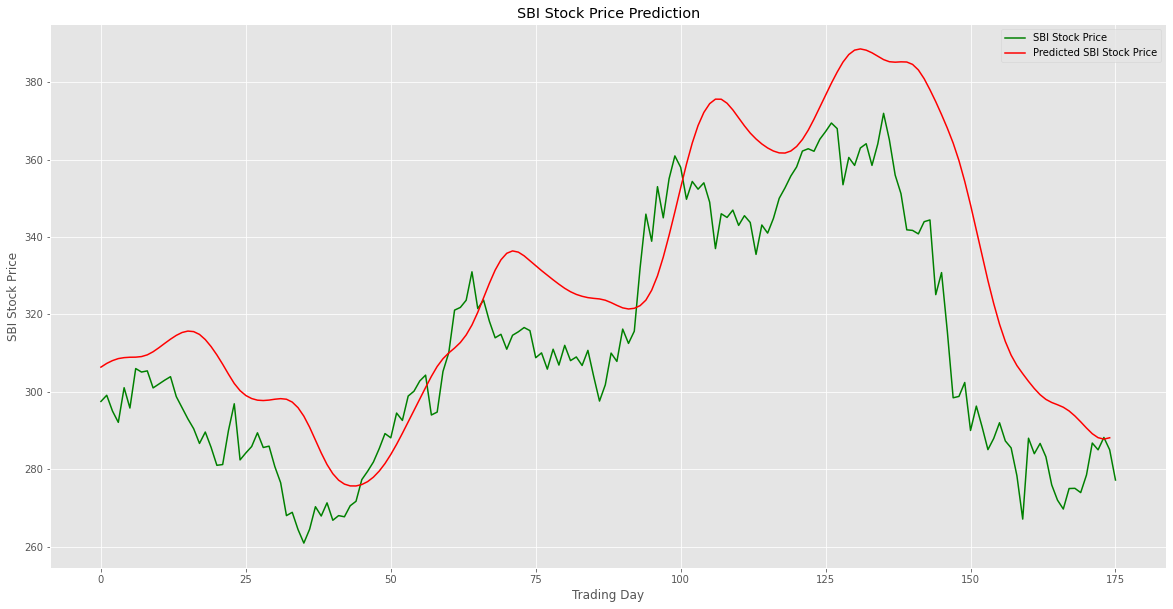

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'SBI Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted SBI Stock Price')
plt.title('SBI Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('SBI Stock Price')
plt.legend()
plt.show()